# Parameter Recovery Demo

In this demo, we show a parameter recovery using `psignifit`. Parameter recovery is a crucial step in validating the robustness and accuracy of a model. We simulate data with known parameters and then attempt to recover those parameters using the psignifit algorithm. If the fitting procedure returns the same parameter values as the true parameters that generated the data, then we can be sure that the fitting works correctly. In `tests/test_param_recovery.py` we systematically run this test.

We will cover the following steps:

  1. Simulating data with known parameters.
  
  2. Fitting the model to the simulated data.
  
  3. Comparing the recovered parameters to the original parameters.


In [1]:
import psignifit
from psignifit import psigniplot
import numpy as np
from matplotlib import pyplot as plt

First, we set parameters using which the data will be simulated

In [2]:
width = 0.3
stim_range = [0.001, 0.001 + width * 1.1]
threshold = stim_range[1]/3
lambda_ = 0.0232
gamma = 0.1
nsteps = 20
num_trials = 50000
sigmoid = "norm"
stimulus_level = np.linspace(stim_range[0], stim_range[1], nsteps)

Using the `tools.psychometric` we can simulate percent correct values for each stimulus level

In [3]:
perccorr = psignifit.tools.psychometric(stimulus_level, threshold, width, gamma, lambda_, sigmoid)

We construct our data array

In [4]:
ntrials = np.ones(nsteps) * num_trials
hits = (perccorr * ntrials).astype(int)
data = np.dstack([stimulus_level, hits, ntrials]).squeeze()


Text(0, 0.5, 'Percent Correct')

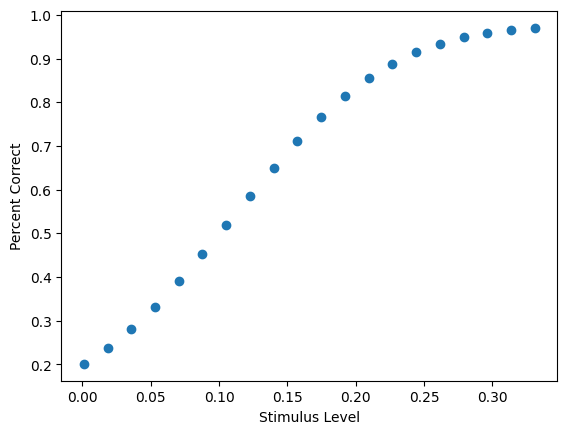

In [5]:
fig, ax = plt.subplots()
ax.scatter(stimulus_level, perccorr)
ax.set_xlabel("Stimulus Level")
ax.set_ylabel("Percent Correct")

We set the options for our fit. In this case we assume a yes/no experiment and we want to estimate all parameters (i.e. fix none).

In [6]:
options = {}
options['sigmoid'] = sigmoid 
options['experiment_type'] = 'yes/no'
options['fixed_parameters'] = {}
options["stimulus_range"] = stim_range

Now we run the fitting procedure

In [7]:
res = psignifit.psignifit(data, **options)

Lastly, we can ensure that the values in our `res.parameter_estimate` dictionary are equal to the values that we used to simulate them

In [12]:
assert np.isclose(res.parameter_estimate['lambda'], lambda_, atol=1e-4)

In [16]:
assert np.isclose(res.parameter_estimate['gamma'], gamma, atol=1e-3)

In [17]:
assert np.isclose(res.parameter_estimate['eta'], 0, atol=1e-4)
assert np.isclose(res.parameter_estimate['threshold'], threshold, atol=1e-4)
assert np.isclose(res.parameter_estimate['width'], width, atol=1e-4)

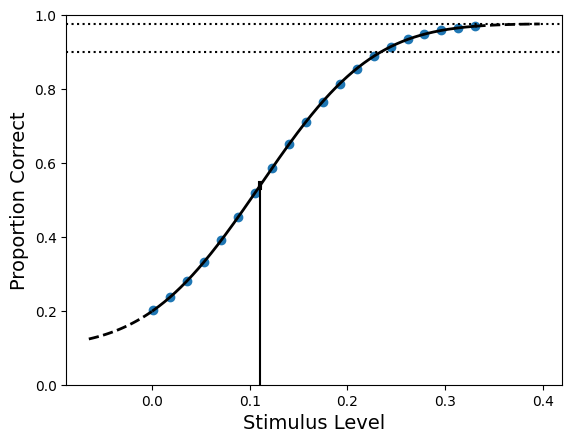

In [11]:
fig, ax = plt.subplots()
psigniplot.plot_psychometric_function(res, ax=ax)
ax.scatter(stimulus_level, perccorr)

# And now with some more realistic data...

In [30]:
eta = 0.2 # this parameter decides how noisy (overdispersed) the data is
perccorr = psignifit.tools.psychometric_with_eta(stimulus_level, threshold, width, gamma, lambda_, sigmoid, eta)

ntrials = np.ones(nsteps) * num_trials
hits = (perccorr * ntrials).astype(int)
data = np.dstack([stimulus_level, hits, ntrials]).squeeze()

Text(0, 0.5, 'Percent Correct')

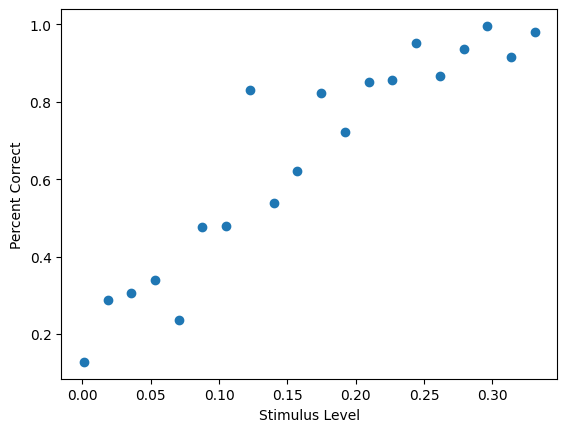

In [31]:
fig, ax = plt.subplots()
ax.scatter(stimulus_level, perccorr)
ax.set_xlabel("Stimulus Level")
ax.set_ylabel("Percent Correct")

We run the fit again

In [32]:
options = {}
options['sigmoid'] = sigmoid 
options['experiment_type'] = 'yes/no'
options['fixed_parameters'] = {}
options["stimulus_range"] = stim_range

In [33]:
res = psignifit.psignifit(data, **options)

plot to ensure we found a good fit

<Axes: xlabel='Stimulus Level', ylabel='Proportion Correct'>

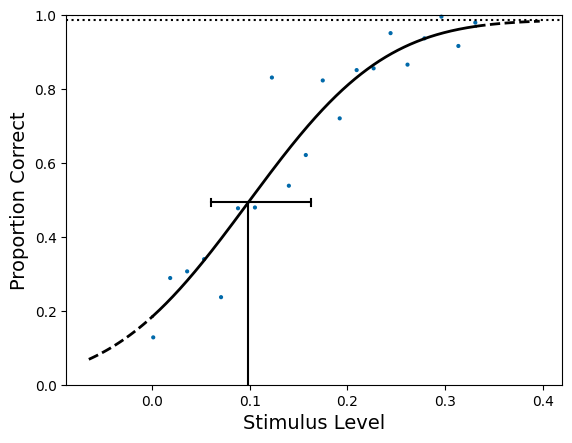

In [35]:
fig, ax = plt.subplots()
psigniplot.plot_psychometric_function(res, ax=ax)